# Урок 7

## Линейная регрессия. Однофакторный дисперсионный анализ

__Линейная регрессия__ — используемая в статистике регрессионная модель зависимости _объясняемой_ переменной $y$ от другой или нескольких других переменных (_факторов_) $x$ с линейной функцией зависимости:
$$y = b_0 + b_1 x_1 + \dots + b_k x_k.$$

__Парная регрессия__ — частный случай линейной регрессии, когда рассматривается только один признак (т.е. $k = 1$). Для парной регрессии коэффициенты вычисляются по формулам:
$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \:\:
b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

Здесь $x$, $y$ — данные из выборки, $\overline{x}$ — выборочное среднее.

__Пример 1__

Рассмотрим данные со значениями площадей квартир в квадратных метрах (массив `x1`) и соответствующими им ценами на квартиры в тысячах долларов (массив `y1`), приведеннные для $12$ наблюдений. По этим данным построим модель линейной регрессии.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

plt.style.use('seaborn-whitegrid')

In [2]:
x1 = np.array([80, 90, 85, 115, 85, 85, 90, 80, 105, 110, 65, 100])
y1 = np.array([150, 160, 155, 175, 140, 150, 140, 155, 165, 190, 140, 165])

Найдём коэффициенты линейной регрессии:

In [3]:
b1 = ((x1 * y1).mean() - x1.mean() * y1.mean()) / ((x1 ** 2).mean() - x1.mean() ** 2)
b1

0.8717472118959082

In [4]:
b0 = y1.mean() - b1 * x1.mean()
b0

77.89962825278835

Итак, модель линейной регрессии имеет вид:
$$y = 77.9 + 0.87 \cdot x,$$
т.е. с увеличением площади квартиры на $1$ квадратный метр цена возрастет на $0.87$ тысячи долларов. Визуализируем полученные результаты на графике.

Text(0, 0.5, 'цена')

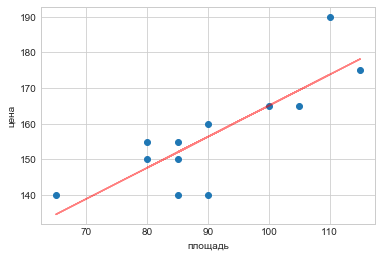

In [5]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('площадь')
plt.ylabel('цена')

В общем случае, когда факторов больше одного, в некоторых ситуациях удаётся также найти аналитическое решение. Это делается с помощью __метода наименьших квадратов__.

Для удобства записи введём дополнительный «фактор» $x_0 = 1$. Это позволит записать уравнение регрессии в более компактном матричном виде:
$$y = x \cdot b,$$
где 
$b = \left(
\begin{array}{c}
b_0 \\
\vdots \\
b_k
\end{array}
\right)$ — столбец коэффициентов регрессии,
$x = \left( x_0, \dots, x_k \right)$ — строка факторов.

Пусть теперь у нас имеется $m$ реальных наблюдений, т.е. $m$ различных строк $x$ и $m$ различных значений $y$. Эти наблюдения удобно записывать в виде т.н. __матрицы объект-признак__ $X$ и столбца целевого признака. Зафиксируем следующие обозначения, чтобы не путаться:
$$X = \left(
\begin{array}{ccc}
x_{10} & \dots & x_{1k} \\
x_{20} & \dots & x_{2k} \\
\vdots & \ddots & \vdots \\
x_{m0} & \dots & x_{mk}
\end{array}
\right), \: 
y = \left(
\begin{array}{c}
y_1 \\
\vdots \\
y_m
\end{array}
\right).$$

В матрице $X$ размера $m \times (k + 1)$ каждая строка соответствует одному наблюдению, т.е. содержит в себе $k + 1$ значений соответствующих факторов (включая фиктивный фактор с индексом $0$). $i$-му наблюдению соответствует значение в $i$-й строке из $y$.

В этих обозначениях задача линейной регрессии состоит в том, чтобы решить систему уравнений:
$$X \cdot b = y$$
с вектором переменных $b$. Чаще всего такая система не имеет решений, поэтому задача состоит в минимизации расстояния между векторами $X \cdot b$ и $y$:
$$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b.$$
Для такой задачи возможно записать аналитическое решение:
$$b = (X^\top X)^{-1} X^\top y.$$

Проблема метода наименьших квадратов заключается в том, что если определитель матрицы $X^\top X$ очень близок к $0$, то вычисление обратной матрицы становится неустойчивым. Поэтому в общем случае более предпочтительными являются другие методы оптимизации, например, _градиентный спуск_.

__Пример 2__

Рассмотрим данные о хоккеистах и попробуем построить модель регрессии, которая будет предсказывать возраст хоккеиста по его росту и весу.

In [15]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])
df = df.drop_duplicates(['name', 'birth'])

In [16]:
x2 = df[['height', 'weight']].values

y2 = df['age'].values.reshape(-1, 1)
y2

array([[24.95277207],
       [21.11978097],
       [25.229295  ],
       ...,
       [26.82546201],
       [26.01232033],
       [20.39698836]])

К матрице $X$ (массив `x2`) нужно также добавить столбец из $1$, соответствующий фиктивному фактору.

In [17]:
x2.shape

(3294, 2)

In [18]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [19]:
x2.shape

(3294, 3)

In [20]:
x2

array([[  1., 185.,  84.],
       [  1., 188.,  86.],
       [  1., 182.,  95.],
       ...,
       [  1., 191.,  88.],
       [  1., 188.,  89.],
       [  1., 193.,  95.]])

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [21]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

27479241781874.695

In [22]:
XTX

array([[3.29400000e+03, 6.05534000e+05, 2.88108500e+05],
       [6.05534000e+05, 1.11413388e+08, 5.30507835e+07],
       [2.88108500e+05, 5.30507835e+07, 2.53626632e+07]])

Определитель не близок к нулю, поэтому можно записать аналитическое решение:

In [23]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[50.41616613]
 [-0.21077511]
 [ 0.16818038]]


Итак, наша модель регрессии имеет вид:
$$y = 50.4162 - 0.2108 \cdot x_1 + 0.1682 \cdot x_2,$$
где $x_1$ — рост хоккеиста, $x_2$ — вес хоккеиста.

Для оценки качества модели линейной регрессии можно использовать __коэффициент детерминации__. Этот коэффициент представляет собой долю дисперсии переменной $y$, которая _объясняется_ моделью. Он обозначается $R^2$ и принимает значения между $0$ и $1$.

Чтобы посчитать коэффициент детерминации, построим «предсказанные» моделью значения
$$z_i = b_0 + b_1 x_{i1} + \dots + b_k x_{ik}$$
для $i$-го объекта из выборки. Пусть $D_y$ — выборочная дисперсия по массиву реальных значений $y$, а $D_{model}$ — выборочная дисперсия по массиву предсказанных значений $z$.

__Коэффициент детерминации__:
$$R^2 = \dfrac{D_{model}}{D_y}$$

Коэффициент детерминации можно также посчитать как квадрат коэффициента корреляции между объясняемой переменной $y$ и предсказанной переменной $z$:
$$R^2 = r_{yz}^2.$$

В случае парной регрессии это значение сводится к корреляции между переменными $x$ и $y$, поскольку переменная $z$ линейной выражается через $x$.
$$R^2 = r_{xy}^2$$

__Пример 3__

Посчитаем коэффициент детерминации для модели из примера 1. Для этого создадим массив из предсказанных значений:

In [24]:
z1 = b0 + b1 * x1

print(f'real: {y1[:5]}')
print(f'pred: {z1[:5]}')

real: [150 160 155 175 140]
pred: [147.6394052  156.35687732 151.99814126 178.15055762 151.99814126]


Итак, коэффициент детерминации:

In [25]:
R1 = z1.var() / y1.var()
R1

0.6752261641274645

Коэффициент детерминации, равный $0.6752$, означает, что $67 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью. Оставшиеся $33 \%$ обусловлены какими-то ещё факторами, которые модель не учла.

Посчитаем это значение как квадрат коэффициента корреляции между массивами `x1` и `y1`:

In [26]:
np.corrcoef(x1, y1) ** 2

array([[1.        , 0.67522616],
       [0.67522616, 1.        ]])

__Пример 4__

Также посчитаем коэффициент деретминации для примера 2:

In [27]:
z2 = x2.dot(b)

print(f'real: {y2[:6].T}')
print(f'pred: {z2[:6].T}')

real: [[24.95277207 21.11978097 25.229295   29.67556468 23.49075975 25.43737166]]
pred: [[25.54992175 25.25395716 28.03223123 27.19352792 28.33039439 25.37734423]]


In [28]:
R2 = z2.var() / y2.var()
R2

0.04641517695955142

In [29]:
y2.var()

18.03209753944778

In [31]:
z2.var()

0.8369629982453604

Как мы видим, коэффициент детерминации для второй модели оказался очень низок. Это может быть обусловлено как низким качеством модели, так и тем, что распределения рассматриваемых случайных величин не столь близки к нормальным.

Другим удобным способом оценки качества модели является __средняя ошибка аппроксимации__. Она вычисляется по формуле:
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8$-$10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

__Пример 5__

Посчитаем среднюю ошибку аппроксимации для первых двух примеров.

In [32]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

Для примера 1:

In [33]:
mean_approximation_error(y1, z1)

0.040889968858542215

Для примера 2:

In [34]:
mean_approximation_error(y2, z2)

0.12957818187494263

### Оценка значимости уравнения линейной регрессии

Оценить статистическую значимость уравнения линейной регрессии в целом можно с помощью __F-критерия Фишера__. В этом случае нулевая гипотеза состоит в том, что все коэффициенты регрессии равны нулю. Соответствующая статистика равна
$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $k$ — число факторов. В литературе часто используются обозначения $k_1 = k$, $k_2 = n - k - 1$ (иногда вместо $k_1$, $k_2$ пишут также $f_1$, $f_2$).

Критическое значение $F_{сrit} = F(k_1, k_2)$ можно найти по таблице (например, по [такой](https://www.chem-astu.ru/science/reference/F-statistic.html)) или с помощью функции `scipy.stats.f.ppf`.

Если $T > F_{crit}$, то нулевая гипотеза отвергается и уравнение регрессии признаётся статистически значимым.

__Пример 6__

Для первого примера имеем $k_1 = 1$, $k_2 = 12 - 2 = 10$. Посчитаем значение статистики $T$:

In [35]:
k1 = 1
k2 = 10

T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

20.79065766838655

Для уровня значимости $\alpha = 0.05$ посчитаем по таблице значение $F_{crit} = F(1, 10)$. Оно равно $4.96$. То же самое с помощью `scipy`:

In [36]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

4.9646027437307145

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

Для второго примера $k_1 = 2$, $k_2 = 3294 - 2 - 1 = 3291$. Значение статистики $T$:

In [37]:
k1 = 2
k2 = 3291

T2 = (R2 / (1 - R2)) * (k2 / k1)
T2

80.09373874410142

In [38]:
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

2.9984608850665975

В случае парной регрессии с помощью t-распределения Стьюдента можно построить доверительные интервалы для коэффициентов регрессии.

Например, построим доверительный интервал коэффициента наклона $b_1$ (из уравнения $y = b_0 + b_1 \cdot x$). Нам понадобится значение __стандартной ошибки коэффициента наклона__. Она вычисляется по формуле:
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$
где:
* $x$, $x_i$ — соответственно, все значения и конкретное значение фактора
* $y_i$ — конкретное значение оцениваемой (целевой) переменной
* $z_i$ — «предсказанное» значение, полученное с помощью модели регрессии
* $n$ — число элементов в выборке

Допустим, мы получили коэффициент наклона $\hat{b}_1$ (например, с помощью формул для парной регрессии или с помощью метода наименьших квадратов). Пусть $b_1$ — реальное значение этого коэффициента. Тогда статистика
$$T = \dfrac{\hat{b}_1 - b_1}{S_{slope}}$$
имеет распределение Стьюдента с $n - 2$ степенями свободы. Для выбранного нами уровня доверия $p = 1 - \alpha$ доверительный интервал выглядит следующим образом:
$$P \left( \hat{b}_1 - t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p$$

Аналогично можно построить доверительный интервал для коэффициента сдвига $b_0$. __Стандартная ошибка коэффициента сдвига__ вычисляется по формуле:
$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

__Пример 7__

В примере 1 мы получили модель парной регрессии с коэффициентами:

In [39]:
b0, b1

(77.89962825278835, 0.8717472118959082)

Построим для коэффициента наклона доверительный интервал.

In [40]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [41]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.19118616125822901

Зададим уровень доверия $p = 0.95$, т.е. $\alpha = 0.05$. В нашем случае $n = 12$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \: 10} = 2.2281$.

In [42]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=10)
t

2.2281388519649385

Доверительный интервал для параметра $b_1$:

In [43]:
(b1 - t * s_slope, b1 + t * s_slope)

(0.4457578980384142, 1.2977365257534021)

Аналогично для параметра $b_0$:

In [44]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [45]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

17.561570286154595

Доверительный интервал для параметра $b_0$:

In [46]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(38.77001119669427, 117.02924530888242)

### Дисперсионный анализ

__Дисперсионный анализ__ — метод в математической статистике, направленный на поиск зависимостей в данных, в которых целевая переменная является _абсолютной_ (_количественной_), а факторы являются _номинативными_ (_категориальными_).

В __однофакторном дисперсионном анализе__ на одну переменную $Y$ влияет один фактор, наблюдаемый на $k$ _уровнях_, т.е. имеем $k$ выборок для переменной $Y$. Проверяется гипотеза $H_0$ о равенстве средних значений по каждой выборке:
$$H_0: \: \overline{y_1} = \dots = \overline{y_k}.$$

Наблюдаемые данные обозначим $y_{ij}$, где $i$ — индекс уровня ($i = 1, 2, \dots, k$), $j$ — индекс наблюдения на $i$-м уровне ($j = 1, 2, \dots, n_i$). Здесь $n_i$ — число наблюдений на $i$-м уровне. Таким образом, 
$$y_i = \{ y_{i1}, \dots, y_{i n_i} \}$$
для $i = 1, 2, \dots, k$. Соответственно, $\overline{y_i}$ — среднее значение на выборке $y_i$. Обозначим через $n$ общее число наблюдений:
$$n = \displaystyle\sum_{j=1}^{k} n_i.$$

Среднее от всей выборки:
$$\overline{y} = \dfrac{1}{n} \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} y_{ij}.$$

Сумма квадратов отклонений наблюдений от общего среднего:
$$S^2 = \displaystyle\sum_{i=1}^{k} \displaystyle\sum_{j=1}^{n_i} ({y}_{ij} - \overline{y})^2.$$

Эту сумму можно разбить на сумму квадратов отклонений средних групповых значений от общего среднего значения $\overline{y}$:
$$S_F^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i$$
и остаточную сумму квадратов отклонений:
$$S_{res}^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2.$$

Для этих значений должно быть справедливо равенство
$$S^2 = S_F^2 + S_{res}^2.$$

По этим значениям можно вычислить соответствующие несмещённые оценки дисперсий:
$$\sigma_F^2 = \dfrac{S_F^2}{k - 1}, \: \sigma_{res}^2 = \dfrac{S_{res}^2}{n - k}.$$

Для проверки гипотезы $H_0$ запишем статистику
$$T = \dfrac{\sigma_F^2}{\sigma_{res}^2}.$$

В предположении верности гипотезы $H_0$ статистика $T$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$. Для выбранного уровня значимости $\alpha$ можно рассчитать критическое значение $F_{crit}$, равное квантилю порядка $1 - \alpha$ для распределения $F(k_1, k_2)$. Если $T > F_{crit}$, то гипотеза $H_0$ отвергается.

__Пример 8__

Среди людей, проживающих в одном городе, выделены три группы по профессии: бухгалтеры, юристы, программисты. Имеются данные по зарплатам в этих трёх группах:
```
y1 = [70, 50, 65, 60, 75]
y2 = [80, 75, 90, 70, 75, 65, 85, 100]
y3 = [130, 100, 140, 150, 160, 170, 200]
```
Требуется проверить гипотезу у равенстве средней зарплаты по каждой группе. Для проверки этой гипотезы воспользуемся однофакторным дисперсионным анализом.

In [47]:
y1 = np.array([70, 50, 65, 60, 75])
y2 = np.array([80, 75, 90, 70, 75, 65, 85, 100])
y3 = np.array([130, 100, 140, 150, 160, 170, 200])

n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]

n1, n2, n3

(5, 8, 7)

Выборочные средние по каждой группе:

In [48]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y3.mean()

y1_mean, y2_mean, y3_mean

(64.0, 80.0, 150.0)

Видно, что средние зарплаты разнятся. Проверим статистическую значимость этого отличия. 

Соберём все значения заработных плат в один массив:

In [49]:
y = np.concatenate([y1, y2, y3])

print(y)

[ 70  50  65  60  75  80  75  90  70  75  65  85 100 130 100 140 150 160
 170 200]


In [50]:
y_mean = y.mean()
y_mean

100.5

Найдём значения $S_F^2$ и $S_{res}^2$:

In [51]:
S2_F = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2

S2_res = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

S2_F, S2_res

(27175.0, 7270.0)

Проверим выполнение равенства $S^2 = S_F^2 + S_{res}^2:$

In [52]:
S2_F + S2_res == ((y - y_mean) ** 2).sum()

True

Запишем оценки дисперсий:

In [53]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(13587.5, 427.6470588235294)

Итак, значение статистики $T$:

In [54]:
T = sigma2_F / sigma2_res
T

31.77269601100413

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [55]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.5915305684750827

Видим, что $T > F_{crit}$, поэтому заключаем, что отличие средних зарплат действительно является статистически значимым.

### Упражнения

__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

__Задача 2__

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

__Задача 3__

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).